In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [10]:
train_data.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [9]:
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [11]:
train_data.shape

(599, 11)

In [12]:
train_data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
train_data.corr()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


In [24]:
train_data['Sepssis'].value_counts()


Negative    391
Positive    208
Name: Sepssis, dtype: int64

<AxesSubplot:>

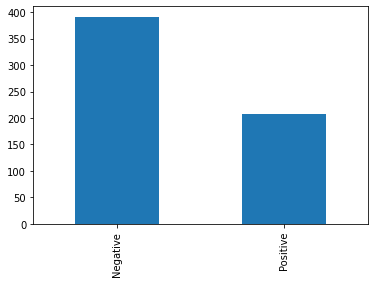

In [25]:
train_data['Sepssis'].value_counts().plot(kind='bar')

In [27]:
train_data.groupby('Sepssis').mean()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
Sepssis,,,,,,,,,
Negative,3.317136,109.442455,67.872123,19.680307,67.066496,30.076471,0.436524,31.478261,0.664962
Positive,4.778846,140.288462,70.350962,22.221154,102.759615,35.385577,0.565144,36.697115,0.725962


In [55]:
x = train_data.drop(['ID','Insurance','Sepssis'], axis = 1)
y = train_data['Sepssis']

In [56]:
x.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [57]:
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepssis, dtype: object

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(x)

StandardScaler()

In [60]:
standardise_data = scaler.transform(x)

In [61]:
print(standardise_data)

[[ 0.64740245  0.85274382  0.1691093  ...  0.20995541  0.43233261
   1.41383587]
 [-0.84067916 -1.07651239 -0.14145729 ... -0.6648762  -0.38600171
  -0.19380386]
 [ 1.24263509  1.92455283 -0.24497949 ... -1.07729681  0.56575669
  -0.10919124]
 ...
 [-1.13829548 -1.62772845  0.37615369 ...  1.67217396 -0.85150349
   1.0753854 ]
 [-0.84067916 -0.95401993 -2.3154234  ... -0.51490506  0.23071401
  -1.03993003]
 [-0.84067916  1.61832169  0.27263149 ...  0.60987843 -1.16579131
   0.39848446]]


In [62]:
classifier = svm.SVC(kernel='linear')

In [65]:
classifier.fit(standardise_data, y)

SVC(kernel='linear')

In [66]:
train_predict = classifier.predict(standardise_data)
train_accuracy = accuracy_score(train_predict , y)
print(train_accuracy)

0.7813021702838063


In [68]:
input = (1,92,62,25,41,19.5,0.482,25)

input_np = np.asarray(input)
input_reshape = input_np.reshape(1,-1)

#standardize the data
input_stand = scaler.transform(input_reshape)

prediction = classifier.predict(input_stand)
if prediction == 1:
    print("Person is septic")
else:
    print("Person is non-septic")    
print(prediction)

Person is non-septic
['Negative']


c:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
